# `Group Project` - Boston 2017 Bike Sharing Analysis

## Introduction
In this project we will work with real world data from "Blue Bikes" which is a bike sharing firm based in Boston.

Our focus lies on data of the year 2017 and we will make a comprehensive analysis, in which we use typical data analysis and machine learning approaches to make use of the data to monitize and optimize the operations of "Blue Bikes". The overall topic is smart mobility systems and how we can use data in impactful ways to address pressing societal issues. In terms of bike sharing the addressed societal issue are the reduce of greenhouse gas emissions, reduce of pollution as health risk for urban population, reduce of (fatal) road accidents and to create a more efficient road transport infrastructur. We will cover the following task:

- **Task 1) Data Collection & Preparation**: 
    * Cleaning of datasets for use in later analysis stages
- **Task 2) Descriptive Analysis**: 
    * Demonstrate temporal demand patterns and seasonality
    * Demonstrate geographical demand patterns 
    * Define Key Performance Indicators which provides overview of current fleet operations
- **Task 3) Predictive Analysis**:
    * Forecast total system-level demand in the next hour

**The authors of this analysis are:**
* Robin Kirch      (7364580)
* Niklas Nesseler  (7367375)
* Lukas Tempfli    (7367097)
* Pascal Zajonz    (7369974)
* Sven Dornbrach   (7364484)
* Moritz Danhausen (7369413)


Hint: Please run the seperated cells from the top to the bottom

### Required Imports

In [32]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta 
import matplotlib.pyplot as plt
#import folium
#from folium import plugins
#from folium.plugins import HeatMap
from datetime import datetime 
from datetime import timedelta 
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")
#import etc


# `Task 1) Data Collection & Preparation:`

### Details to Task 1
#TODO
Detailed introduction to task 1 here

### Blue Bike Data

In [33]:
raw_data_boston = pd.read_csv("boston_2017.csv")
#Problematisch bei gleicher Startzeit und ggbf. kompletten Dateipfad angeben notwendig

In [34]:

raw_data_boston["start_time"]=pd.to_datetime(raw_data_boston["start_time"], format="%Y/%m/%d %H:")

#rdb=raw_data_boston
#rdb=pd.to_datetime(rdb["start_time"], format="%Y-%m-%d %H:")
raw_data_boston["end_time"]=pd.to_datetime(raw_data_boston["end_time"], format="%Y/%m/%d %H:")
#raw_data_boston
#rdb
raw_data_boston["hour"]=raw_data_boston["start_time"].dt.hour
raw_data_boston["year"]=raw_data_boston["start_time"].dt.year
raw_data_boston["month"]=raw_data_boston["start_time"].dt.month
raw_data_boston["day"]=raw_data_boston["start_time"].dt.day
raw_data_boston["seconds"]=raw_data_boston["start_time"].dt.second
raw_data_boston["duration"]=raw_data_boston["end_time"]-raw_data_boston["start_time"]

df1=pd.DataFrame({'year':raw_data_boston["year"],'month':raw_data_boston["month"],'day':raw_data_boston["day"],'hour':raw_data_boston["hour"] })
df1=pd.to_datetime(df1, format="%Y/%m/%d, %H:")

raw_data_boston["date_time"]=df1

#del raw_data_boston["hour"]
del raw_data_boston["year"]
del raw_data_boston["month"]
del raw_data_boston["day"]
del raw_data_boston["seconds"]

raw_data_boston

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,hour,duration,date_time
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,0,0 days 00:05:51,2017-01-01 00:00:00
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,0,0 days 00:14:51,2017-01-01 00:00:00
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,0,0 days 00:27:53,2017-01-01 00:00:00
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,0,0 days 00:12:28,2017-01-01 00:00:00
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,0,0 days 00:10:22,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber,23,0 days 00:04:09,2017-12-31 23:00:00
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber,16,0 days 00:04:22,2017-12-29 16:00:00
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber,8,0 days 00:16:24,2017-12-30 08:00:00
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber,12,0 days 00:29:11,2017-12-30 12:00:00


In [35]:
raw_data_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313774 entries, 0 to 1313773
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1313774 non-null  datetime64[ns] 
 1   end_time            1313774 non-null  datetime64[ns] 
 2   start_station_id    1313774 non-null  int64          
 3   end_station_id      1313774 non-null  int64          
 4   start_station_name  1313774 non-null  object         
 5   end_station_name    1313774 non-null  object         
 6   bike_id             1313774 non-null  int64          
 7   user_type           1313774 non-null  object         
 8   hour                1313774 non-null  int64          
 9   duration            1313774 non-null  timedelta64[ns]
 10  date_time           1313774 non-null  datetime64[ns] 
dtypes: datetime64[ns](3), int64(4), object(3), timedelta64[ns](1)
memory usage: 110.3+ MB


In [36]:
raw_data_boston.describe()

,start_station_id,end_station_id,bike_id,hour,duration
count,1.313774e+06,1.313774e+06,1.313774e+06,1.313774e+06,1313774
mean,8.571053e+01,8.554360e+01,9.931371e+02,1.373430e+01,0 days 00:18:57.437388774
std,5.634766e+01,5.648317e+01,5.701397e+02,4.777680e+00,0 days 03:43:04.336374452
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1 days +23:06:07
25%,4.300000e+01,4.300000e+01,5.160000e+02,9.000000e+00,0 days 00:06:34
50%,7.400000e+01,7.400000e+01,9.780000e+02,1.400000e+01,0 days 00:10:56
75%,1.170000e+02,1.170000e+02,1.512000e+03,1.700000e+01,0 days 00:17:55
max,2.320000e+02,2.320000e+02,1.981000e+03,2.300000e+01,48 days 08:40:21


In [37]:
raw_data_boston.columns

Index(['start_time', 'end_time', 'start_station_id', 'end_station_id',
       'start_station_name', 'end_station_name', 'bike_id', 'user_type',
       'hour', 'duration', 'date_time'],
      dtype='object')

In [38]:
raw_data_boston["end_time"].describe()
#start_time nicht zugreifbar

<ipython-input-38-0a5c0f10cd4b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  raw_data_boston["end_time"].describe()


count                 1313774
unique                1245112
top       2017-08-15 17:37:49
freq                        6
first     2017-01-01 00:12:49
last      2018-01-07 20:00:16
Name: end_time, dtype: object

In [39]:
raw_data_boston["start_station_id"].describe()

count    1.313774e+06
mean     8.571053e+01
std      5.634766e+01
min      1.000000e+00
25%      4.300000e+01
50%      7.400000e+01
75%      1.170000e+02
max      2.320000e+02
Name: start_station_id, dtype: float64

In [40]:
raw_data_boston["end_station_id"].describe()

count    1.313774e+06
mean     8.554360e+01
std      5.648317e+01
min      1.000000e+00
25%      4.300000e+01
50%      7.400000e+01
75%      1.170000e+02
max      2.320000e+02
Name: end_station_id, dtype: float64

In [41]:
raw_data_boston["start_station_name"].describe()

count                          1313774
unique                             285
top       MIT at Mass Ave / Amherst St
freq                             42320
Name: start_station_name, dtype: object

In [42]:
raw_data_boston["end_station_name"].describe()

count                          1313774
unique                             283
top       MIT at Mass Ave / Amherst St
freq                             42442
Name: end_station_name, dtype: object

In [43]:
raw_data_boston["bike_id"].describe()

count    1.313774e+06
mean     9.931371e+02
std      5.701397e+02
min      1.000000e+00
25%      5.160000e+02
50%      9.780000e+02
75%      1.512000e+03
max      1.981000e+03
Name: bike_id, dtype: float64

In [44]:
raw_data_boston["user_type"].describe()

count        1313774
unique             2
top       Subscriber
freq         1104738
Name: user_type, dtype: object

In [45]:
raw_data_boston["duration"].describe()

count                      1313774
mean     0 days 00:18:57.437388774
std      0 days 03:43:04.336374452
min              -1 days +23:06:07
25%                0 days 00:06:34
50%                0 days 00:10:56
75%                0 days 00:17:55
max               48 days 08:40:21
Name: duration, dtype: object

In [46]:
#Limited duration to prevent using incorrect data

raw_data_boston = raw_data_boston[(raw_data_boston["duration"]>"P0DT0H2M0S")&
                           (raw_data_boston["duration"]<"P0DT8H0M0S")]

raw_data_boston["duration"].describe()

count                      1302372
mean     0 days 00:15:17.483793416
std      0 days 00:19:58.729193062
min                0 days 00:02:01
25%                0 days 00:06:39
50%                0 days 00:10:59
75%                0 days 00:17:56
max                0 days 07:59:56
Name: duration, dtype: object

In [47]:
raw_data_boston.count()

start_time            1302372
end_time              1302372
start_station_id      1302372
end_station_id        1302372
start_station_name    1302372
end_station_name      1302372
bike_id               1302372
user_type             1302372
hour                  1302372
duration              1302372
date_time             1302372
dtype: int64

In [48]:
#check for and remove duplicates
raw_data_boston = raw_data_boston.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
raw_data_boston.count()

start_time            1302372
end_time              1302372
start_station_id      1302372
end_station_id        1302372
start_station_name    1302372
end_station_name      1302372
bike_id               1302372
user_type             1302372
hour                  1302372
duration              1302372
date_time             1302372
dtype: int64

In [49]:
raw_data_boston

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,hour,duration,date_time
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,0,0 days 00:05:51,2017-01-01 00:00:00
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,0,0 days 00:14:51,2017-01-01 00:00:00
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,0,0 days 00:27:53,2017-01-01 00:00:00
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,0,0 days 00:12:28,2017-01-01 00:00:00
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,0,0 days 00:10:22,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1302367,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber,23,0 days 00:04:09,2017-12-31 23:00:00
1302368,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber,16,0 days 00:04:22,2017-12-29 16:00:00
1302369,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber,8,0 days 00:16:24,2017-12-30 08:00:00
1302370,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber,12,0 days 00:29:11,2017-12-30 12:00:00


In [50]:
bike_list = raw_data_boston["bike_id"].unique()
fleet_size = len(bike_list)
fleet_size


1799

In [51]:
def get_date (ts):
    return ts.date()

def get_weekday (ts):
    return ts.weekday()

def get_hour (ts):
    return ts.hour
def set1 (ts):
    return 1

### Weather Data

In [52]:
raw_data_weather= pd.read_csv("weather_hourly_boston.csv")
raw_data_weather["date_time"]=pd.to_datetime(raw_data_weather["date_time"])


In [53]:
raw_data_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  43354 non-null  datetime64[ns]
 1   max_temp   43354 non-null  float64       
 2   min_temp   43354 non-null  float64       
 3   precip     43356 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 MB


In [54]:
raw_data_weather.head(20)

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.1,-1.1,0.0
1,2015-01-02 02:00:00,-1.1,-1.1,0.0
2,2015-01-02 03:00:00,-0.6,-0.6,0.0
3,2015-01-02 04:00:00,-0.6,-0.6,0.0
4,2015-01-02 05:00:00,-0.6,-0.6,0.0
5,2015-01-01 06:00:00,-5.6,-5.6,0.0
6,2015-01-01 07:00:00,-5.6,-5.6,0.0
7,2015-01-01 08:00:00,-5.6,-5.6,0.0
8,2015-01-01 09:00:00,-4.4,-4.4,0.0
9,2015-01-01 10:00:00,-5.6,-5.6,0.0


In [55]:
raw_station_location = pd.read_csv("current_bluebikes_stations.csv")
raw_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Last Updated    379 non-null    object
 1   June 11th 2021  379 non-null    object
 2   Unnamed: 2      379 non-null    object
 3   Unnamed: 3      379 non-null    object
 4   Unnamed: 4      376 non-null    object
 5   Unnamed: 5      379 non-null    object
 6   Unnamed: 6      379 non-null    object
dtypes: object(7)
memory usage: 20.9+ KB


In [56]:
raw_station_location.describe()

,Last Updated,June 11th 2021,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
count,379,379,379,379,376,379,379
unique,379,379,379,379,11,2,22
top,C32065,One Memorial Drive,42.34366582,-71.0630089,Boston,Yes,15
freq,1,1,1,1,225,378,136


In [57]:
raw_station_location.head(50)

,Last Updated,June 11th 2021,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Number,Name,Latitude,Longitude,District,Public,Total docks
1,W32006,160 Arsenal,42.36466403,-71.17569387,Watertown,Yes,11
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18
3,S32035,191 Beacon St,42.38032335,-71.10878613,Somerville,Yes,19
4,C32094,2 Hummingbird Lane at Olmsted Green,42.28887,-71.095003,Boston,Yes,17
5,S32023,30 Dane St,42.38100143,-71.10402523,Somerville,Yes,15
6,M32026,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412,Cambridge,Yes,23
7,C32091,645 Summer St,42.34178089,-71.03987017,Boston,Yes,19
8,M32054,699 Mt Auburn St,42.37500235,-71.14871614,Cambridge,Yes,25
9,V32001,7 Acre Park,42.41143223,-71.06823265,Everett,Yes,15


In [58]:
station_location = raw_station_location
station_location.drop(0,inplace=True)
station_location.rename(columns={'Last Updated':'Number','June 11th 2021':'Name','Unnamed: 2':'Latitude','Unnamed: 3':'Longitude','Unnamed: 4':'District',
                                 'Unnamed: 5':'Public','Unnamed: 6':'Total Docks'}, inplace = True)
station_location.head(50)


,Number,Name,Latitude,Longitude,District,Public,Total Docks
1,W32006,160 Arsenal,42.36466403,-71.17569387,Watertown,Yes,11
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18
3,S32035,191 Beacon St,42.38032335,-71.10878613,Somerville,Yes,19
4,C32094,2 Hummingbird Lane at Olmsted Green,42.28887,-71.095003,Boston,Yes,17
5,S32023,30 Dane St,42.38100143,-71.10402523,Somerville,Yes,15
6,M32026,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412,Cambridge,Yes,23
7,C32091,645 Summer St,42.34178089,-71.03987017,Boston,Yes,19
8,M32054,699 Mt Auburn St,42.37500235,-71.14871614,Cambridge,Yes,25
9,V32001,7 Acre Park,42.41143223,-71.06823265,Everett,Yes,15
10,B32060,700 Commonwealth Ave.,42.34960945,-71.10391524,Boston,Yes,16


In [59]:
first_date =datetime(year=2017,day=1,month=1)
lastdate=datetime(year=2017, day=31,month =12)

neu_weather_2017= raw_data_weather[(raw_data_weather["date_time"]>=first_date)&(raw_data_weather["date_time"]<=lastdate)]
neu_weather_2017.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 17520 to 26279
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8667 non-null   datetime64[ns]
 1   max_temp   8667 non-null   float64       
 2   min_temp   8667 non-null   float64       
 3   precip     8667 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 338.6 KB


In [60]:
neu_weather_2017.describe()

,max_temp,min_temp,precip
count,8667.000000,8667.000000,8667.000000
mean,11.407477,11.349233,0.102688
std,9.862449,9.858241,0.303569
min,-16.700000,-16.700000,0.000000
25%,3.900000,3.900000,0.000000
50%,11.700000,11.700000,0.000000
75%,19.400000,19.400000,0.000000
max,35.000000,35.000000,1.000000


In [61]:
raw_data_boston["Date"] = raw_data_boston["start_time"].apply(lambda ts: get_date (ts))
raw_data_boston["Rented"]=raw_data_boston["Date"].apply(lambda ts: set1(ts))
raw_data_boston.head(50)

rdb_kopie= raw_data_boston

In [62]:
bikes_rented_total

NameError: name 'bikes_rented_total' is not defined

## Demand in dependency of the temperature

In [64]:
#connecting both data sets by  the date with an inner join

left=raw_data_boston
right=neu_weather_2017


inner_merge = pd.merge(left=left, right=right, left_on="date_time", right_on="date_time")

inner_merge

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,hour,duration,date_time,Date,Rented,max_temp,min_temp,precip
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,0,0 days 00:05:51,2017-01-01,2017-01-01,1,3.9,3.9,0.0
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,0,0 days 00:14:51,2017-01-01,2017-01-01,1,3.9,3.9,0.0
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,0,0 days 00:27:53,2017-01-01,2017-01-01,1,3.9,3.9,0.0
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,0,0 days 00:12:28,2017-01-01,2017-01-01,1,3.9,3.9,0.0
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,0,0 days 00:10:22,2017-01-01,2017-01-01,1,3.9,3.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285887,2017-12-31 00:16:21,2017-12-31 00:40:04,66,91,Allston Green District - Griggs St at Commonwe...,One Kendall Square at Hampshire St / Portland St,325,Subscriber,0,0 days 00:23:43,2017-12-31,2017-12-31,1,-7.8,-7.8,0.0
1285888,2017-12-31 00:28:08,2017-12-31 00:33:06,12,27,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,Roxbury Crossing T Stop - Columbus Ave at Trem...,1709,Subscriber,0,0 days 00:04:58,2017-12-31,2017-12-31,1,-7.8,-7.8,0.0
1285889,2017-12-31 00:42:58,2017-12-31 00:52:44,76,179,Central Sq Post Office / Cambridge City Hall a...,MIT Vassar St,762,Subscriber,0,0 days 00:09:46,2017-12-31,2017-12-31,1,-7.8,-7.8,0.0
1285890,2017-12-31 00:54:06,2017-12-31 00:59:29,36,81,Copley Square - Dartmouth St at Boylston St,Boylston St at Washington St,1326,Subscriber,0,0 days 00:05:23,2017-12-31,2017-12-31,1,-7.8,-7.8,0.0


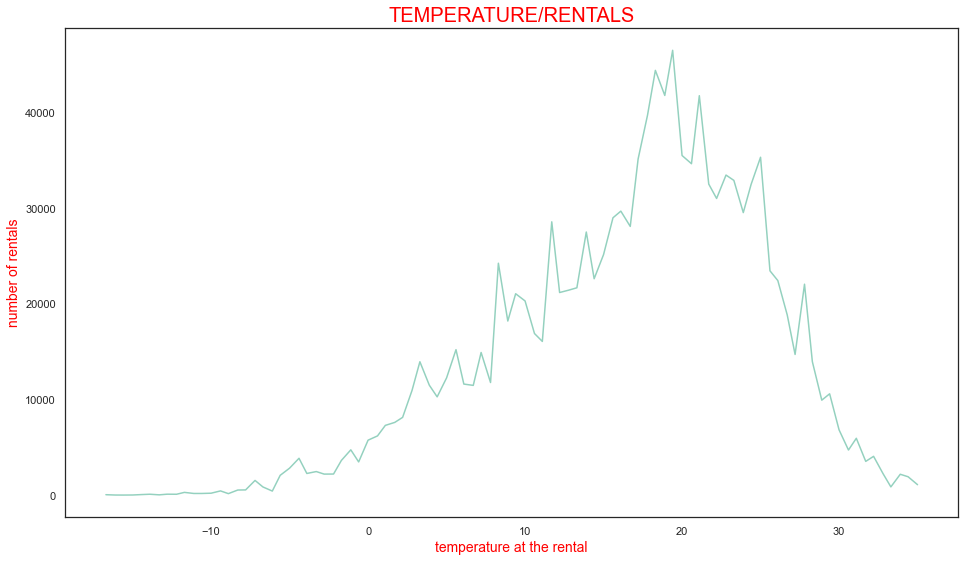

In [65]:

weather_rentals=inner_merge.groupby("min_temp")["Rented"].sum()

Fig_2, ax_2= plt.subplots(figsize=(16,9))

ax_2.plot(weather_rentals)

ax_2.set_title("TEMPERATURE/RENTALS", fontsize = 20, fontname = "arial", color = "red")
ax_2.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_2.set_xlabel("temperature at the rental", fontsize = 14, color = "red")

plt.show()





## add weekday to raw_data_boston

In [66]:
#add the weekday to the data

raw_data_boston["Weekday"] = raw_data_boston["start_time"].apply(lambda ts: get_weekday (ts))

## Popularity of the stations 

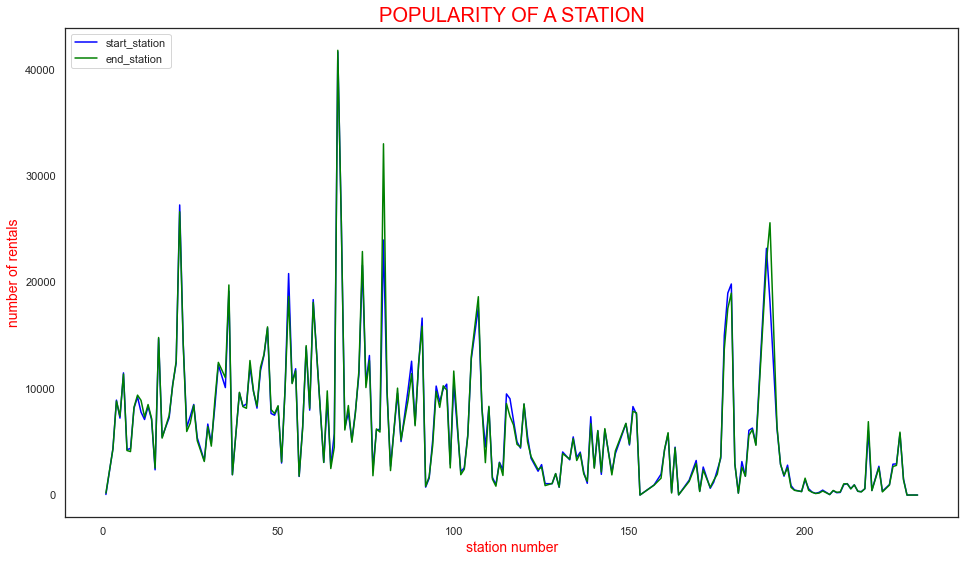

In [67]:
start_station_rentals=inner_merge.groupby("start_station_id")["Rented"].sum()
end_station_rentals=inner_merge.groupby("end_station_id")["Rented"].sum()


Fig_4, ax_4= plt.subplots(figsize=(16,9))

ax_4.plot(start_station_rentals, label="start_station", color = "blue")
ax_4.plot(end_station_rentals , label="end_station", color = "green")

ax_4.set_title("POPULARITY OF A STATION", fontsize = 20, fontname = "arial", color = "red")
ax_4.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_4.set_xlabel("station number", fontsize = 14, color = "red")


plt.legend(loc="upper left")




In [68]:
ypos= raw_data_boston["start_station_id"].unique()
#ypos1=len(ypos)
#ypos1
ypos

array([ 67,  36,  46,  10,  47, 107,  58,   9,  88,  89, 133,  27,  80,
        22,  39, 178,  42,   4, 115, 161, 102,  33,  84,  25, 131, 152,
        51,  21,  23,  32,  94,  49,  54, 146, 179,  30,  96, 190,   8,
        41, 110, 197,  93,  68, 145,  19, 105, 180,  87, 185, 119,  59,
        73, 118,  77, 215,  16,  81,  11, 213,  98,  14, 195, 163, 104,
        78, 176, 184,  76,  95,  43,  74,   6,  91, 169, 183, 100, 116,
       124,  70,   7,  75, 173, 151,  15,   5, 139, 218, 150,  31,  24,
        20,   3,  44, 130,  17,  56, 174, 142, 159,  71,  40, 177, 175,
       160, 189,  63, 108, 141, 149, 137, 109,  37, 117,  90,  57, 121,
       140, 208,  72, 143, 186,  85,  12, 217, 200, 126, 138, 170,  65,
        97, 210, 135, 201, 171,  92, 219,  29, 136, 205, 196, 153,   1,
       192, 202, 162, 214, 209, 216,  64,  48, 203, 129,  60,  13,  35,
        26, 120, 211, 128, 113, 125, 122, 111, 167,  99,  79, 112, 212,
       194,  66,  53, 199, 204,  45,  55,  52,  61, 134,  50, 18

In [69]:
max= raw_data_boston["start_station_id"].quantile(1)
max=int(max)
stations= np.arange(1,233)
stations

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

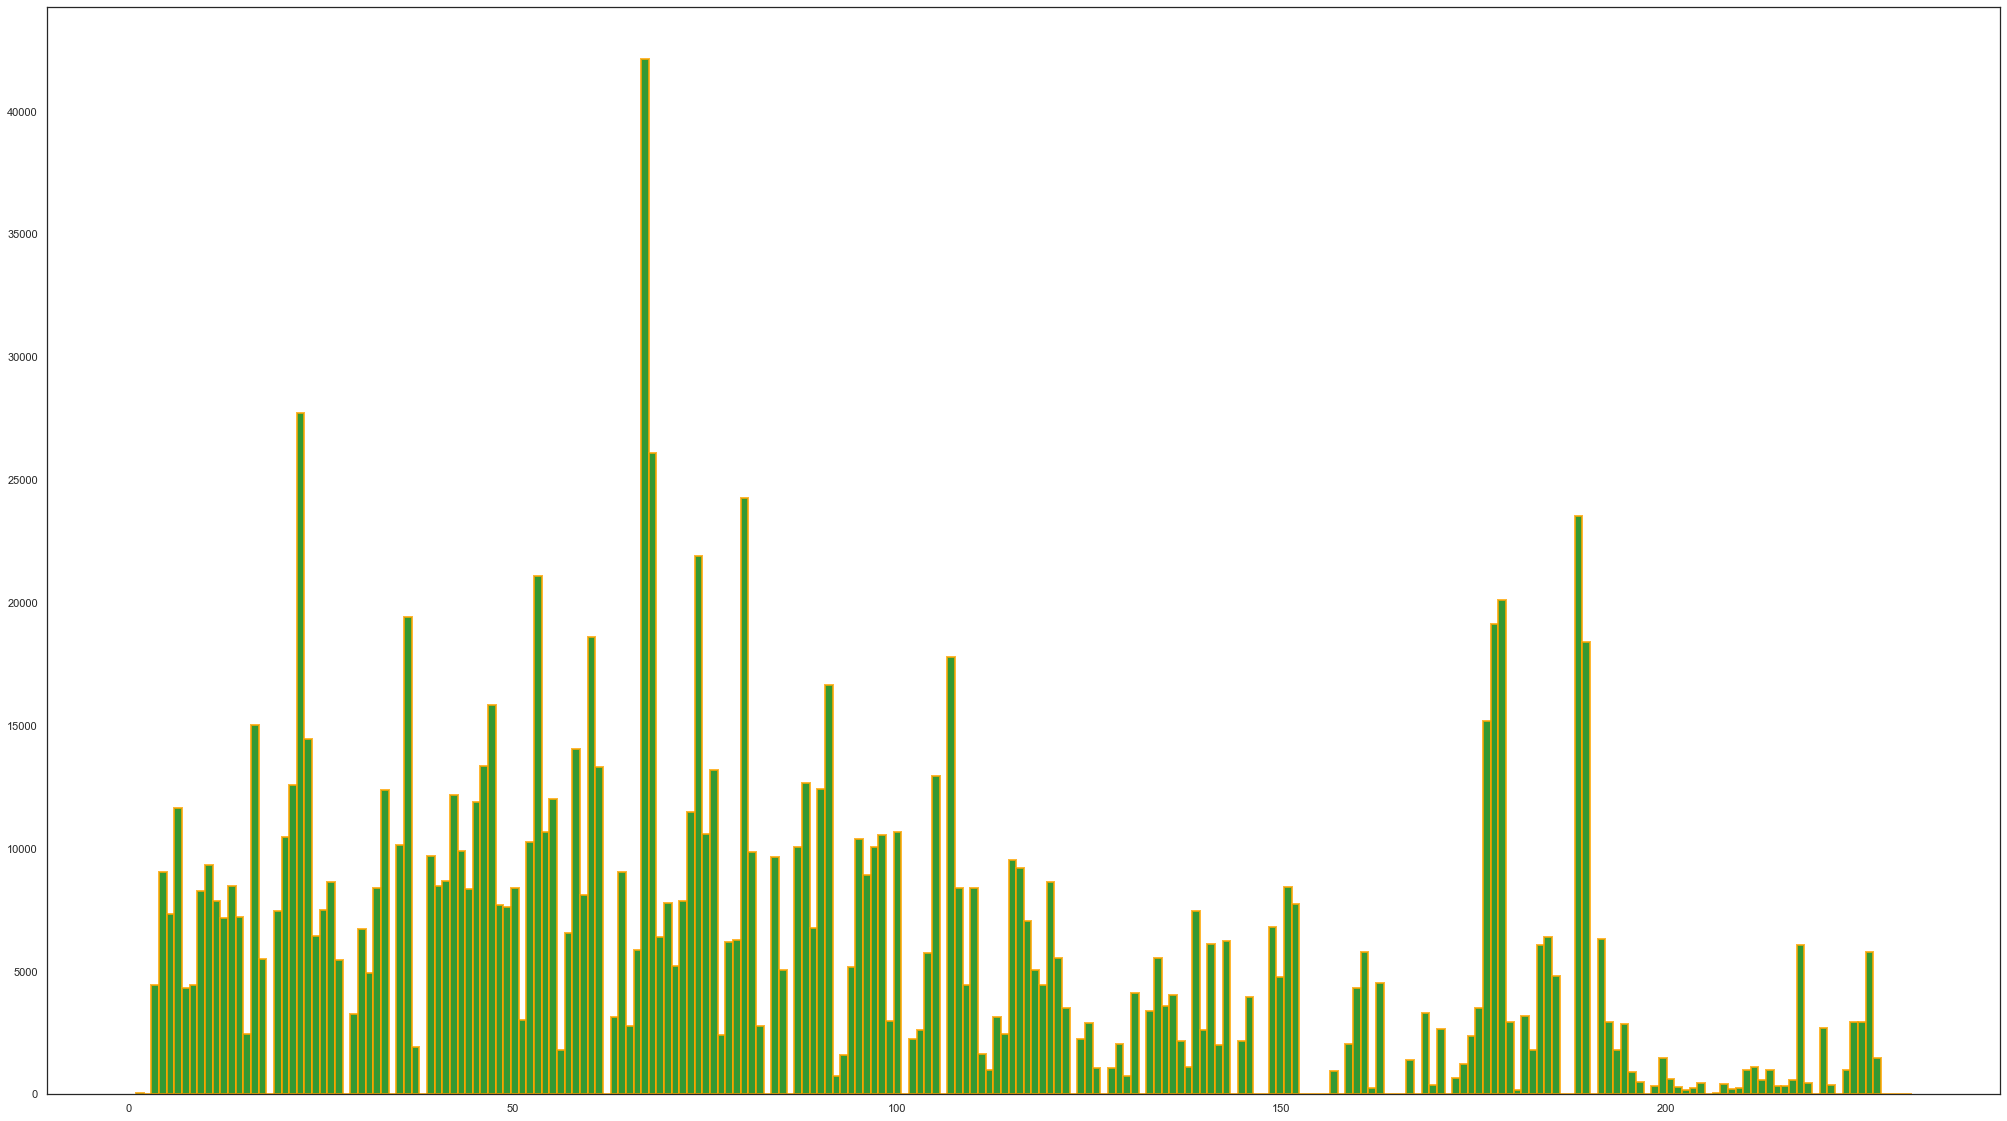

In [70]:
station_rentals=raw_data_boston.groupby("start_station_id")["Rented"].sum()
#plt.bar(stations,station_rentals, width=0.5)
#plt.show
#station_rentals
#plt.hist(raw_data_boston.start_station_id,bins= stations)
plt.figure(figsize=(35,20)) #change your figure size as per your desire here
n,bins,patch = plt.hist(raw_data_boston.start_station_id,bins=232, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)

plt.show()

## Popularity of start stations

In [71]:
df_station_rentals=pd.DataFrame(station_rentals)
df_station_rentals=df_station_rentals.sort_values(["Rented"], ascending=False)

right=df_station_rentals
left=raw_data_boston


inner_merge2 = pd.merge(df_station_rentals,raw_data_boston, on="start_station_id",how="left")
del inner_merge2["start_time"]
del inner_merge2["end_time"]
del inner_merge2["end_station_id"]
del inner_merge2["end_station_name"]
del inner_merge2["bike_id"]
del inner_merge2["user_type"]
del inner_merge2["date_time"]
del inner_merge2["Date"]
del inner_merge2["Rented_y"]
del inner_merge2["Weekday"]
del inner_merge2["hour"]
#pd.merge(left=left, right=right, how="left",left_on="start_station_id", right_on="start_station_id")
inner_merge2=inner_merge2.drop_duplicates(subset=["start_station_id"], keep='first', inplace=False, ignore_index=False)
inner_merge2.set_index("start_station_id",inplace=True)
inner_merge2

,Rented_x,start_station_name,duration
start_station_id,,,
67,42141,MIT at Mass Ave / Amherst St,0 days 00:05:51
22,27746,South Station - 700 Atlantic Ave.,0 days 00:03:14
68,26091,Central Square at Mass Ave / Essex St,0 days 00:14:36
80,24260,MIT Stata Center at Vassar St / Main St,0 days 00:04:19
189,23519,Kendall T,0 days 00:05:47
...,...,...,...
164,23,Test 000e3,0 days 00:24:18
232,4,Four Corners - 157 Washington St,0 days 00:09:05
229,2,8D QC Station 01,0 days 00:14:42


## Demand in dependency of the weather

<function matplotlib.pyplot.show(close=None, block=None)>

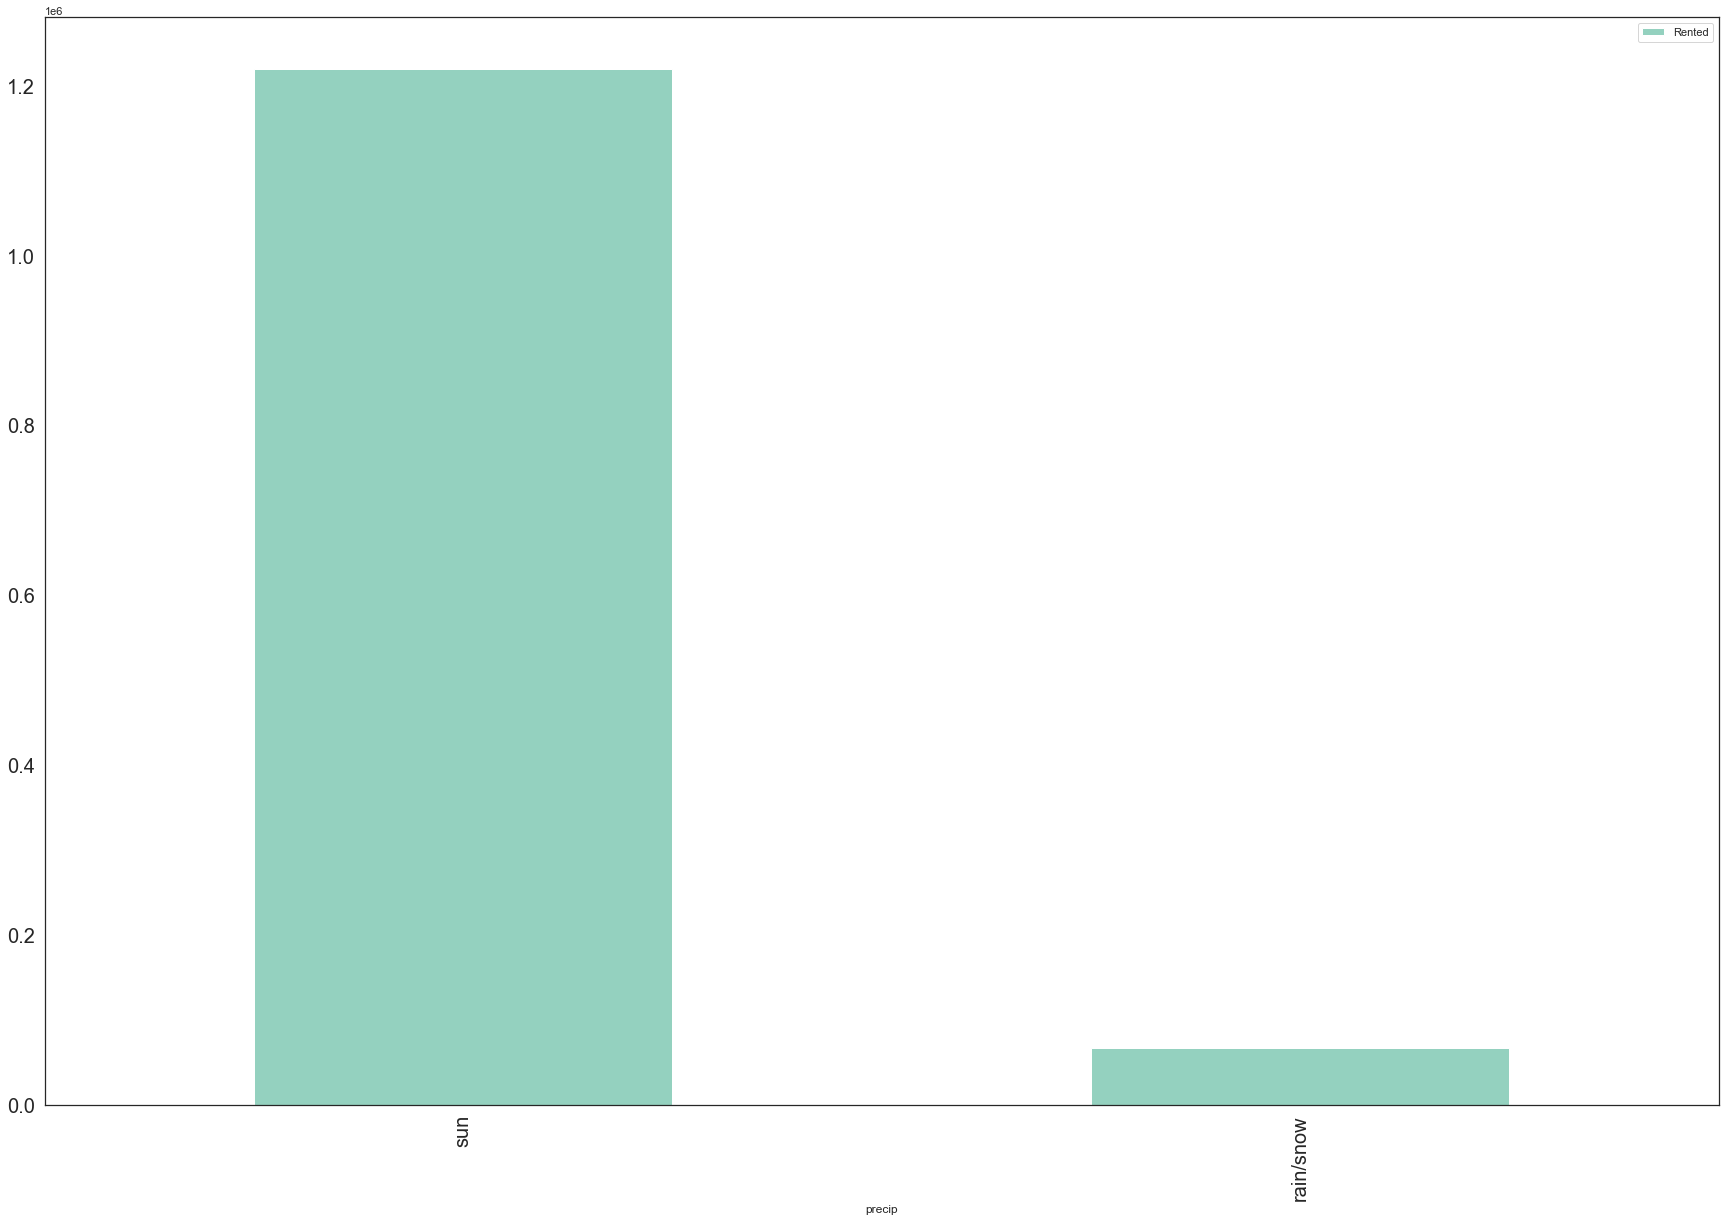

In [72]:

left=raw_data_boston
right=neu_weather_2017


inner_merge3 = pd.merge(left=left, right=right, left_on="date_time", right_on="date_time")

#inner_merge3

station_rentals=inner_merge3.groupby("precip")["Rented"].sum()
#plt.bar(stations,station_rentals, width=0.5)
#plt.show
#station_rentals
#plt.hist(inner_merge3.precip,bins= inner_merge3.Rented)
#plt.figure(figsize=(35,20)) #change your figure size as per your desire here
#n,bins,patch = plt.hist(inner_merge3.precip,bins=2, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)



#dfX=pd.DataFrame({'precip':inner_merge3["precip"],'Rented':inner_merge3.groupby("precip")["Rented"].sum() })
#df.set_index('precip')[['Rented']].plot.bar()
df = pd.DataFrame(station_rentals, columns = ['precip','Rented'])
df.plot.bar(x = 'precip', y = 'Rented',figsize=(30,20),fontsize = 20)
bars = ['sun', 'rain/snow']
y_pos = np.arange(len(bars))

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.show



# `Task 2) Descriptive Analysis:`

### Details to Task 2
#TODO
Detailed introduction to task 2 here

# Temporal Demand Patterns and Seasonality:

## Fleet usage during a day:

<function matplotlib.pyplot.show(close=None, block=None)>

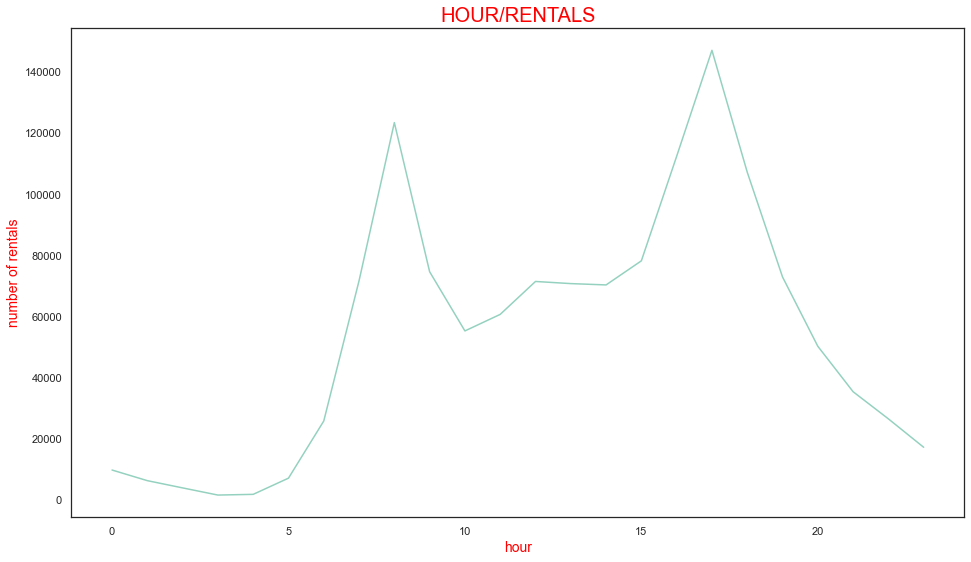

In [73]:
hourly_rentals=raw_data_boston.groupby("hour")["Rented"].sum()
Fig_3, ax_3= plt.subplots(figsize=(16,9))

ax_3.plot(hourly_rentals)

ax_3.set_title("HOUR/RENTALS", fontsize = 20, fontname = "arial", color = "red")
ax_3.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_3.set_xlabel("hour", fontsize = 14, color = "red")


plt.show

As we look upon the graph we notice 2 local extrema.
One in the Morning between 8 and 10 am and one between 4 and 6pm, which shows that the rentals are mostly used by locals to get to and from work.
At night between 11pm and 6am we experience a predictable low point of rented bikes, obviously because most people are active during the day and rest at night.
During midday we experience a consistent number of rented bikes between 60 and 80 thousand.

##  Fleet  usage during the week

<function matplotlib.pyplot.show(close=None, block=None)>

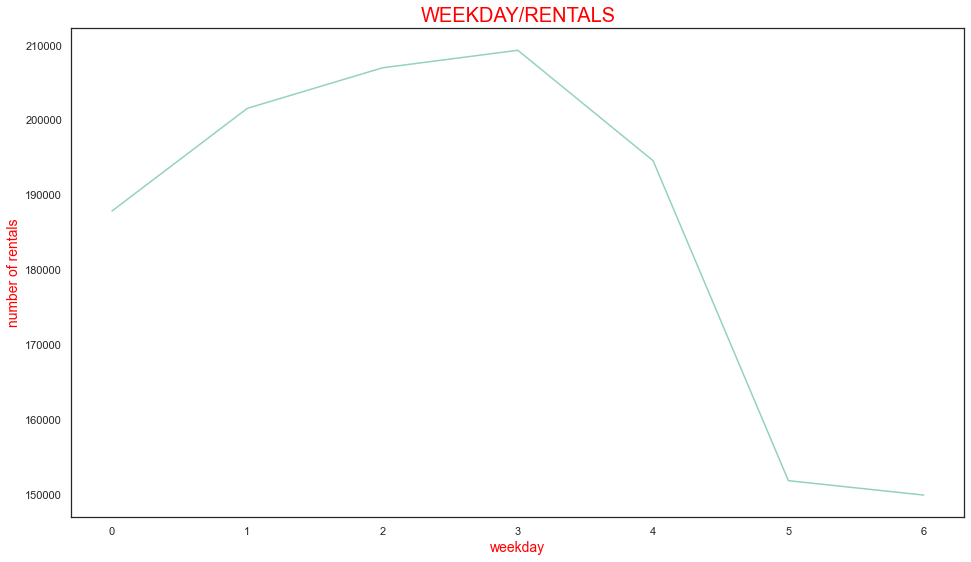

In [74]:
weekday_rentals=raw_data_boston.groupby("Weekday")["Rented"].sum()
Fig_3, ax_3= plt.subplots(figsize=(16,9))

ax_3.plot(weekday_rentals)

ax_3.set_title("WEEKDAY/RENTALS", fontsize = 20, fontname = "arial", color = "red")
ax_3.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_3.set_xlabel("weekday", fontsize = 14, color = "red")


plt.show

In the Graph we can see high demand during the week and low demand at the weekend. Like in the Graph from above the demand is correlated to the working days which means that a bike is rented mostly for the way to work. Due to the fact most of the people do not work at the weekend there is low demand at those days. As a result the major group of people that rent a bikes live in Boston and are not tourists.

## Fleet usage during a year

In [75]:
bikes_rented_total= raw_data_boston.groupby(["Date"], as_index=False)["Rented"].sum()
bikes_rented_total

x_brt=bikes_rented_total["Date"]
y_brt=bikes_rented_total["Rented"]


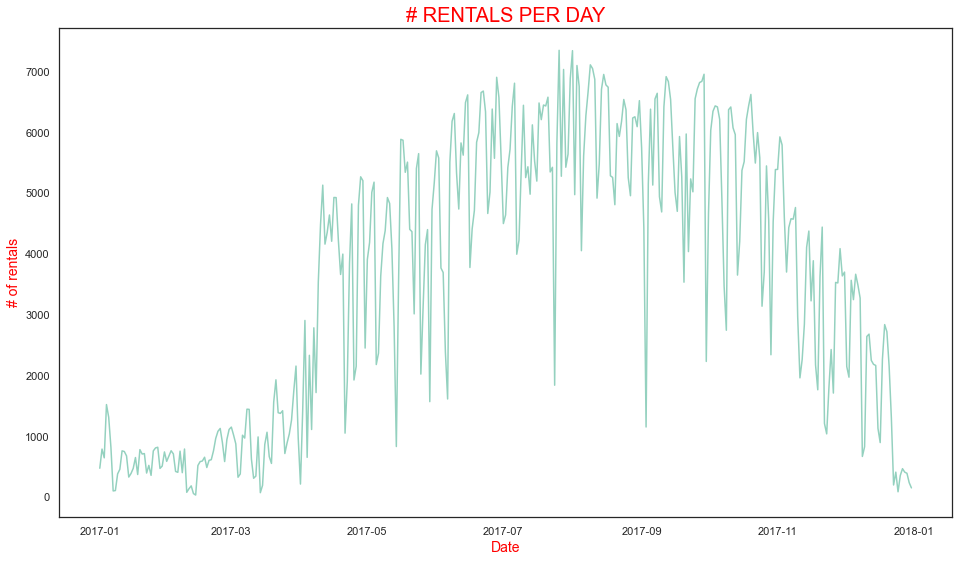

In [76]:
#bikes_rented_total = raw_data_boston.groupby("Date")["Rented"].sum()
fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(x_brt, y_brt)

ax.set_title("# RENTALS PER DAY", fontsize = 20, fontname = "arial", color = "red")
ax.set_ylabel("# of rentals", fontsize = 14, color = "red")
ax.set_xlabel("Date", fontsize = 14, color = "red")

plt.show()

In [77]:
weather_plot= neu_weather_2017

#neu_weather_2017
#weather_plot
del weather_plot ["min_temp"]
#del weather_plot ["precip"]
weather_plot


,date_time,max_temp,precip
17520,2017-01-01 01:00:00,4.4,0.0
17521,2017-01-01 02:00:00,5.0,1.0
17522,2017-01-01 03:00:00,5.0,1.0
17523,2017-01-01 04:00:00,5.0,1.0
17524,2017-01-01 05:00:00,4.4,1.0
...,...,...,...
26275,2017-12-30 20:00:00,-8.3,0.0
26276,2017-12-30 21:00:00,-8.3,1.0
26277,2017-12-30 21:00:00,-8.3,1.0
26278,2017-12-30 22:00:00,-8.3,1.0


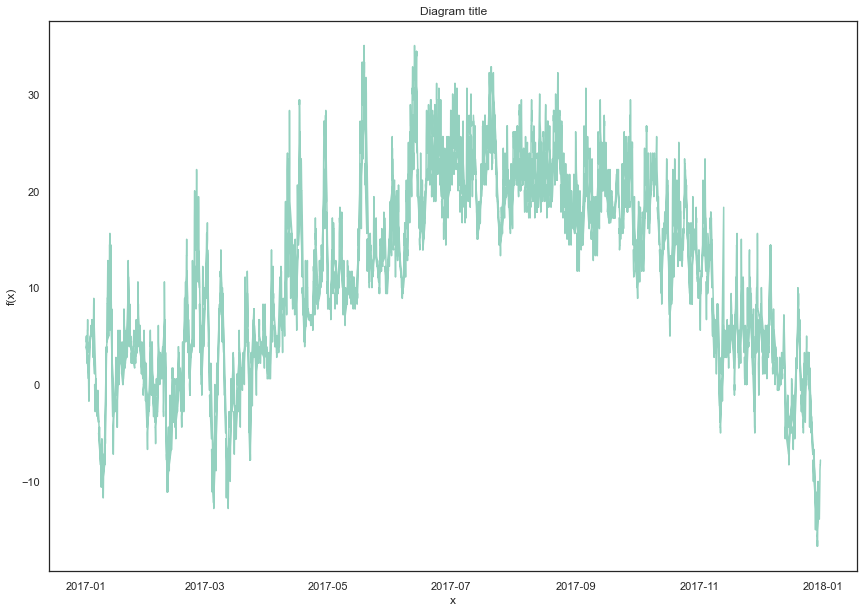

In [78]:

weather_plot

x=weather_plot['date_time']
y=weather_plot['max_temp']

Fig_1 = plt.figure(figsize=(22,15))


ax_1 = Fig_1.add_axes([0.5, 0.5, 0.51, 0.51])
ax_1.plot(x, y)

ax_1.set_xlabel('x')
ax_1.set_ylabel('f(x)')
ax_1.set_title('Diagram title')

plt.show()

As we can see there is much demand in the summer than in the winter. It can be explained with the weather. So there is no need to add the seasons as input feature for our prediction

In [80]:
#data_boston=raw_data_boston
#del data_boston["start_time"]
#del data_boston["end_time"]
#del data_boston["end_station_id"]
#del data_boston["end_station_name"]
#del data_boston["bike_id"]
#del data_boston["user_type"]
#del data_boston["start_station_name"]
#del data_boston["start_station_id"]

data_boston=raw_data_boston[["hour","duration","date_time","Date","Rented","Weekday"]]


left_mergeT = pd.merge(neu_weather_2017,data_boston, on="date_time",how="left")
left_mergeT




,date_time,max_temp,precip,hour,duration,Date,Rented,Weekday
0,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:03:16,2017-01-01,1.0,6.0
1,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:04:19,2017-01-01,1.0,6.0
2,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:03:14,2017-01-01,1.0,6.0
3,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:22:53,2017-01-01,1.0,6.0
4,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:03:38,2017-01-01,1.0,6.0
...,...,...,...,...,...,...,...,...
1286143,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:23:43,2017-12-31,1.0,6.0
1286144,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:04:58,2017-12-31,1.0,6.0
1286145,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:09:46,2017-12-31,1.0,6.0
1286146,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:05:23,2017-12-31,1.0,6.0


In [81]:

left_mergeT["IsWeekday"] = left_mergeT["Weekday"].apply(lambda x: 1 if x<=4 else 0)
left_mergeT

,date_time,max_temp,precip,hour,duration,Date,Rented,Weekday,IsWeekday
0,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:03:16,2017-01-01,1.0,6.0,0
1,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:04:19,2017-01-01,1.0,6.0,0
2,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:03:14,2017-01-01,1.0,6.0,0
3,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:22:53,2017-01-01,1.0,6.0,0
4,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:03:38,2017-01-01,1.0,6.0,0
...,...,...,...,...,...,...,...,...,...
1286143,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:23:43,2017-12-31,1.0,6.0,0
1286144,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:04:58,2017-12-31,1.0,6.0,0
1286145,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:09:46,2017-12-31,1.0,6.0,0
1286146,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:05:23,2017-12-31,1.0,6.0,0


In [82]:
del left_mergeT["Weekday"]
del left_mergeT["Date"]
del left_mergeT["duration"]
    #del left_mergeT["min_temp"]
left_mergeT=left_mergeT.dropna()
left_mergeT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1285892 entries, 0 to 1286147
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   date_time  1285892 non-null  datetime64[ns]
 1   max_temp   1285892 non-null  float64       
 2   precip     1285892 non-null  float64       
 3   hour       1285892 non-null  float64       
 4   Rented     1285892 non-null  float64       
 5   IsWeekday  1285892 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 68.7 MB


In [83]:
summe=left_mergeT.groupby("date_time")["Rented"].sum()
df = pd.DataFrame(summe, columns = ['Rented'])
    #df

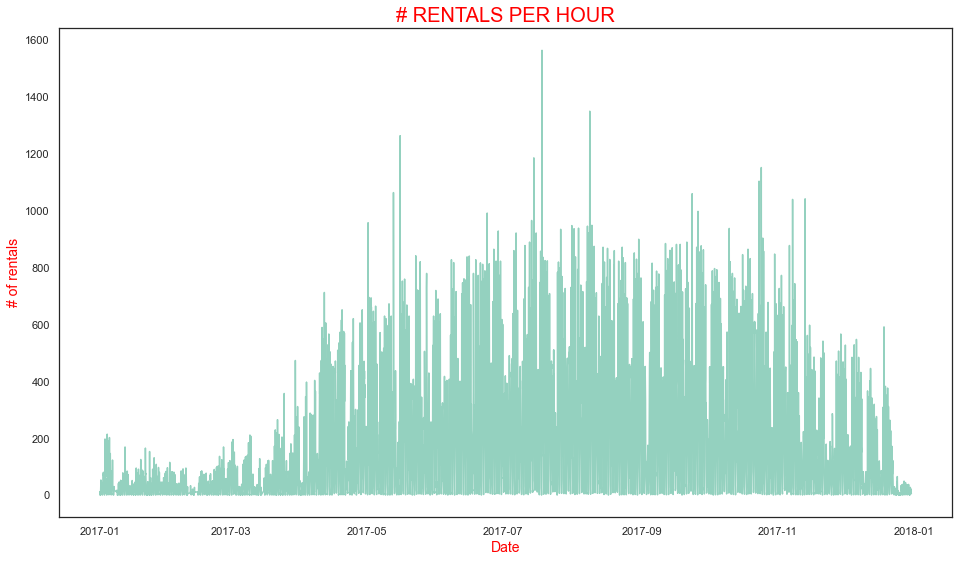

In [84]:
bikes_rented_total = df
fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(bikes_rented_total)

ax.set_title("# RENTALS PER HOUR", fontsize = 20, fontname = "arial", color = "red")
ax.set_ylabel("# of rentals", fontsize = 14, color = "red")
ax.set_xlabel("Date", fontsize = 14, color = "red")

plt.show()



## Selecting the Key Performance Indicators

A first Indicator could be the utilization ratio of the bicicles, to see how many bicicles are on the strett or how many are just waiting at station, so the managers could decide to increase or decrease the total number of bicicles. Futhermore, this KPI can be expanded to utilization ration of the bicicles at a specfic station to examine the uitlization at an popular station for example, so the manager could sent more bikes to this particular station.

Another KPI could be the number of borrowed bikes last hour in proportion of a benchmark. The benchmark can be a indicator for the profit and answers the question: "How many bikes need to be rented to make profit?". So this ratio gives info of how many percent of the break even point is reached. (For simplification we will use the mean value as benchmark) This KPI can be spilted into number of borrowed bikes form customer and from subscribers due to the  fact that there may exist different prices for customer and subcriber.
In summary this KPI shows whether the company is making money

A third KPI could be subscriber/ customer ratio. This KPI gives info of how many percent of the bikes from the last hour has been rented by subscribers or customers. This Key Performance Indicator can be interesting for the marketing department of a company in order to design appropriate advertising 


### Utilization ratio

In [85]:
a=inner_merge["bike_id"]
a=a.unique()
a.size


1799

In [86]:
#extract the prime hour from a random data
rdb=raw_data_boston[["date_time","start_time","bike_id","Weekday"]]

rdb=rdb.set_index(["date_time"])
rdb.loc["2017-06-01 07:00:00"]





,start_time,bike_id,Weekday
date_time,,,
2017-06-01 07:00:00,2017-06-01 07:00:01,1500,3
2017-06-01 07:00:00,2017-06-01 07:00:03,1149,3
2017-06-01 07:00:00,2017-06-01 07:01:10,1280,3
2017-06-01 07:00:00,2017-06-01 07:01:13,1080,3
2017-06-01 07:00:00,2017-06-01 07:01:22,1924,3
...,...,...,...
2017-06-01 07:00:00,2017-06-01 07:59:50,683,3
2017-06-01 07:00:00,2017-06-01 07:04:16,1248,3
2017-06-01 07:00:00,2017-06-01 07:33:14,1839,3


### Number of borrowed bikes last hour benchmark ratio

As mentioned above we will use the average number of borrowed bikes within a hour in the further course of the analysis

### Subscriber customer ratio

# `Task 3) Descriptive Analysis:`

## Select input features for the prediction

In [87]:
inner_merge
wr=inner_merge.groupby(["max_temp"], as_index=False)["Rented"].sum()

In [88]:
yp=wr['Rented']
xp=wr['max_temp']

In [89]:
def plot_regularized_polyregression (x, y, lam, d):
    
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x) - 1
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    theta = np.linalg.solve(X.T @ X + lam*np.eye(X.shape[1]), X.T @ y)  # see lecture notes for derivation!, where np.eye() returns the identity matrix
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    xt = 2*(xt0 - min_x)/(max_x - min_x) - 1
    Xt = np.array([xt**i for i in range(d,-1,-1)]).T
    yt = Xt @ theta
    
    # plotting routine
    plt.figure(figsize = (8,6))
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, yt, 'C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)
    print(theta[:4])

[6345.30970081 8176.13091871 8525.0331368  8237.85203468]


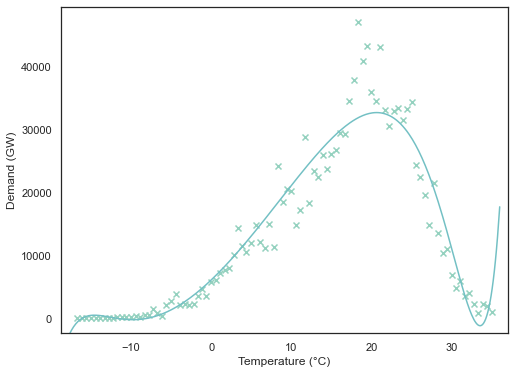

In [90]:
plot_regularized_polyregression(xp,yp,0.1, 15)

#### Details to Task 3 
#### TODO Detailed introduction to task 3 here

In [91]:
left_mergeT2=left_mergeT.drop_duplicates(subset=["date_time"], keep='first', inplace=False, ignore_index=False)
del left_mergeT2['Rented']
left_mergeT3=pd.merge(left_mergeT2,df, on="date_time",how="left")
left_mergeT3.set_index("date_time",inplace=True)
left_mergeT3.head(10)

,max_temp,precip,hour,IsWeekday,Rented
date_time,,,,,
2017-01-01 01:00:00,4.4,0.0,1.0,0,7.0
2017-01-01 02:00:00,5.0,1.0,2.0,0,4.0
2017-01-01 03:00:00,5.0,1.0,3.0,0,2.0
2017-01-01 04:00:00,5.0,1.0,4.0,0,6.0
2017-01-01 05:00:00,4.4,1.0,5.0,0,1.0
2017-01-01 00:00:00,3.9,0.0,0.0,0,13.0
2017-01-02 01:00:00,2.8,0.0,1.0,1,2.0
2017-01-02 02:00:00,2.8,0.0,2.0,1,2.0
2017-01-02 03:00:00,1.7,0.0,3.0,1,1.0


In [92]:
from sklearn import preprocessing
from sklearn.preprocessing import scale

left_mergeT2=left_mergeT.drop_duplicates(subset=["date_time"], keep='first', inplace=False, ignore_index=False)
del left_mergeT2['Rented']
left_mergeT3=pd.merge(left_mergeT2,df, on="date_time",how="left")
#left_mergeT3.set_index("date_time",inplace=True)
del left_mergeT3['date_time']
temp=left_mergeT3['max_temp'].values.reshape(-1,1)
scaled=preprocessing.MinMaxScaler()
left_mergeT3['max_temp']=scaled.fit_transform(temp)

temp=left_mergeT3['precip'].values.reshape(-1,1)
scaled=preprocessing.MinMaxScaler()
left_mergeT3['precip']=scaled.fit_transform(temp)

temp=left_mergeT3['hour'].values.reshape(-1,1)
scaled=preprocessing.MinMaxScaler()
left_mergeT3['hour']=scaled.fit_transform(temp)

temp=left_mergeT3['IsWeekday'].values.reshape(-1,1)
scaled=preprocessing.MinMaxScaler()
left_mergeT3['IsWeekday']=scaled.fit_transform(temp)



left_mergeT3.head(50)

,max_temp,precip,hour,IsWeekday,Rented
0,0.408124,0.0,0.043478,0.0,7.0
1,0.419729,1.0,0.086957,0.0,4.0
2,0.419729,1.0,0.130435,0.0,2.0
3,0.419729,1.0,0.173913,0.0,6.0
4,0.408124,1.0,0.217391,0.0,1.0
5,0.398453,0.0,0.000000,0.0,13.0
6,0.377176,0.0,0.043478,1.0,2.0
7,0.377176,0.0,0.086957,1.0,2.0
8,0.355899,0.0,0.130435,1.0,1.0
9,0.334623,0.0,0.217391,1.0,2.0


In [93]:

X=left_mergeT3[['max_temp','precip','hour','IsWeekday']].values
Y=left_mergeT3['Rented'].values
X

array([[0.40812379, 0.        , 0.04347826, 0.        ],
       [0.41972921, 1.        , 0.08695652, 0.        ],
       [0.41972921, 1.        , 0.13043478, 0.        ],
       ...,
       [0.16247582, 1.        , 0.91304348, 0.        ],
       [0.16247582, 1.        , 0.95652174, 0.        ],
       [0.172147  , 0.        , 0.        , 0.        ]])

In [94]:
b = np.array([Y])
Y= b.T
Y

array([[ 7.],
       [ 4.],
       [ 2.],
       ...,
       [22.],
       [ 6.],
       [ 6.]])

## Predicting hourly demand with KNN Regression

In [95]:
from sklearn.neighbors import KNeighborsRegressor
# Do a 70-30 split first
x_train20, x_test20, y_train20, y_test20 = train_test_split(X, Y, test_size=0.3,random_state=34 )

# now split X_train to achive 50-20-30 split
x_train20, x_hold20, y_train20, y_hold20 = train_test_split(x_train20, y_train20, test_size=(0.2/0.7),random_state=34 )

def find_neighbors (x,y):
    
    # define list for collecting results
    err_train = [] 
    err_test = []
    
    # split data
   # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)
    
    #loop over max_depth
    
    for n in np.arange(1,40): # lets test until 24 for now
        
        # fit model
        
        KNN_reg1 = KNeighborsRegressor(n_neighbors=n)
        KNN_model = KNN_reg1.fit(x_train20, y_train20) 
        
        # compute errors
        
        err_train.append(mean_absolute_error(y_train20, KNN_model.predict(x_train20)))
        err_test.append(mean_absolute_error(y_hold20, KNN_model.predict(x_hold20)))


    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,40), err_train,np.arange(1,40), err_test)
    plt.legend(["Training", "Holdout"])
    plt.xlabel("Neighbors")
    plt.ylabel("MAE")
    plt.title("Search over Neighbor parameter",fontsize=14)
    #plt.ylim((0,1))
    plt.show()



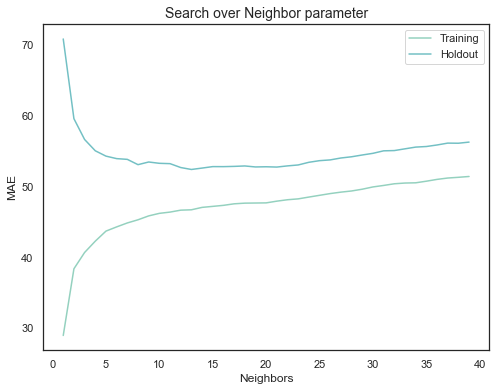

In [96]:
find_neighbors (X,Y)

In [97]:
from sklearn.neighbors import KNeighborsRegressor

#Fit model
KNN_reg = KNeighborsRegressor(n_neighbors=12)
KNN_model = KNN_reg.fit(x_train20, y_train20) 

# Predict
y_hat_KNN = KNN_model.predict(x_test20)

print("MAE:",mean_absolute_error(y_hat_KNN, y_test20), "Bikes")
print("RMSE:",(mean_squared_error(y_hat_KNN, y_test20))**(0.5), "Bikes")  

MAE: 47.5206055508831 Bikes
RMSE: 82.48795571224487 Bikes


## Predicting hourly demand with polynomial linear regression

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def find_degree (x,y):
    
    # define list for collecting results
    err_train = [] 
    err_test = []
    
    # split data
   # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)
    
    #loop over max_depth
    
    for n in np.arange(1,13): # lets test until 24 for now
        
        # fit model
        
        poly_reg = PolynomialFeatures(degree=n)
        X_poly = poly_reg.fit_transform(x_train20)
        lin_reg2 = LinearRegression()
        lin_reg2.fit(X_poly,y_train20)
        
        # compute errors
        
        err_train.append(mean_absolute_error(y_train20, lin_reg2.predict(poly_reg.fit_transform(x_train20))))
        err_test.append(mean_absolute_error(y_hold20, lin_reg2.predict(poly_reg.fit_transform(x_hold20))))


    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,13), err_train,np.arange(1,13), err_test)
    plt.legend(["Training", "Holdout"])
    plt.xlabel("Max degree")
    plt.ylabel("MAE")
    plt.title("Search over max_degree",fontsize=14)
    #plt.ylim((0,1))
    plt.show()



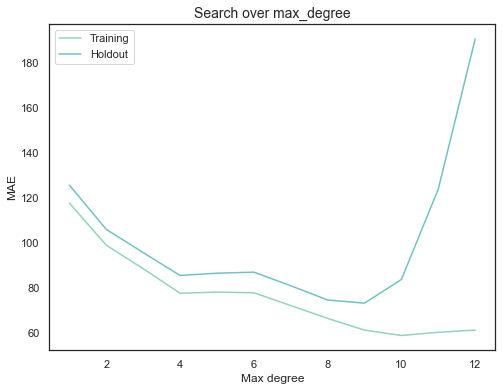

In [99]:
find_degree(X,Y)

In [100]:
poly_reg = PolynomialFeatures(degree=9)
X_poly = poly_reg.fit_transform(x_train20)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y_train20)
pred=lin_reg2.predict(poly_reg.fit_transform(x_test20))

print("MAE:",mean_absolute_error(pred, y_test20), "Bikes")
print("RMSE:",(mean_squared_error(pred, y_test20))**(0.5), "Bikes") 

MAE: 64.58666684188394 Bikes
RMSE: 110.75965004211375 Bikes


## Predicting hourly demand with DecisionTreeRegressor

In [101]:
from sklearn.tree import DecisionTreeRegressor
# Do a 70-30 split first
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.3,random_state=34 )

# now split X_train to achive 50-20-30 split
x_train2, x_hold2, y_train2, y_hold2 = train_test_split(x_train2, y_train2, test_size=(0.2/0.7),random_state=34 )

def find_tree_depth (x,y):
    
    # define list for collecting results
    err_train = [] 
    err_test = []
    
    # split data
   # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)
    
    #loop over max_depth
    
    for n in np.arange(1,21): # lets test until 24 for now
        
        # fit model
        
        tree_reg = DecisionTreeRegressor(max_depth=n)
        tree_model = tree_reg.fit(x_train2,y_train2)
        
        # compute errors
        
        err_train.append(mean_absolute_error(y_train2, tree_model.predict(x_train2)))
        err_test.append(mean_absolute_error(y_hold2, tree_model.predict(x_hold2)))


    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,21), err_train,np.arange(1,21), err_test)
    plt.legend(["Training", "Holdout"])
    plt.xlabel("Max Tree Depth")
    plt.ylabel("MAE")
    plt.title("Search over max_depth parameter",fontsize=14)
    #plt.ylim((0,1))
    plt.show()



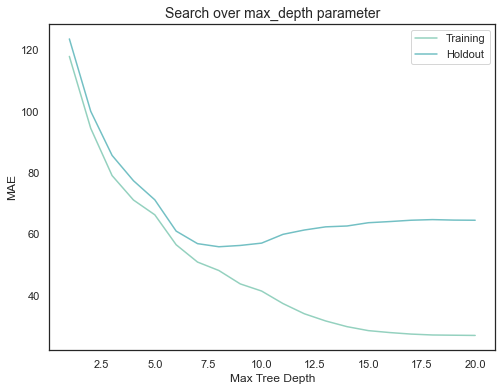

In [102]:
find_tree_depth (X,Y)

In [103]:

# Fit regression model
Tree_reg = DecisionTreeRegressor(max_depth=9)
tree_model = Tree_reg.fit(x_train2, y_train2) 

# Predict
y_hat_tree = tree_model.predict(x_test2)

print("MAE:",mean_absolute_error(y_hat_tree, y_test2), "Bikes")
print("RMSE:",(mean_squared_error(y_hat_tree, y_test2))**(0.5), "Bikes")  

MAE: 50.18581764018217 Bikes
RMSE: 88.179863647624 Bikes
